<a href="https://colab.research.google.com/github/AyushSrivastava27/EthVision/blob/main/EthVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Objective
Predicting the Price of Ethereum Using its Historical Data

###Data

The dataset I've used in this project is taked from: https://finance.yahoo.com/quote/ETH-USD/history

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0f2a9bda-7bc0-242d-aa3b-540e4edec5eb)


### Get Data

In [ ]:
!wget https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv

--2024-03-31 01:44:05--  https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186340 (182K) [text/plain]
Saving to: ‘ETH-USD.csv’

ETH-USD.csv         100%[===================>] 181.97K  --.-KB/s    in 0.02s   

2024-03-31 01:44:05 (7.39 MB/s) - ‘ETH-USD.csv’ saved [186340/186340]



**Importing Time Series Data with Pandas**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/ETH-USD.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2328 entries, 2017-11-09 to 2024-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2328 non-null   float64
 1   High       2328 non-null   float64
 2   Low        2328 non-null   float64
 3   Close      2328 non-null   float64
 4   Adj Close  2328 non-null   float64
 5   Volume     2328 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.3 KB


In [ ]:
df = df.astype({"Close":'float64'})

In [ ]:
len(df)

2328

In [ ]:
# Only want closing price for each day
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


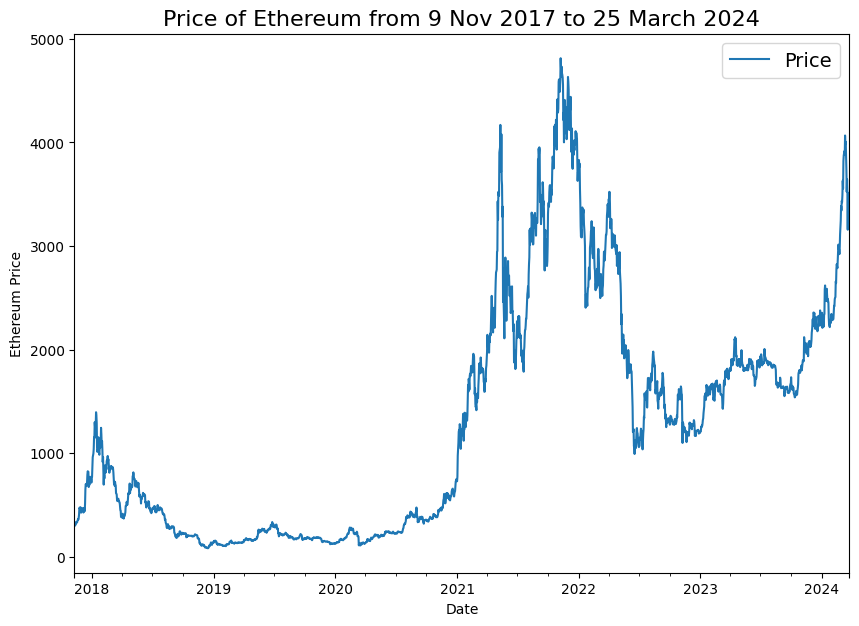

In [ ]:
import matplotlib.pyplot as plt
ethereum_prices.plot(figsize = (10,7))
plt.ylabel("Ethereum Price")
plt.title("Price of Ethereum from 9 Nov 2017 to 25 March 2024", fontsize = 16)
plt.legend(fontsize = 14);


### Importing Time Series Data with Python's CSV Module

In [ ]:
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ETH-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
    eth_price.append(line[4])

# View first 10 of each
timesteps[:10], eth_price[:10]

([datetime.datetime(2017, 11, 9, 0, 0),
  datetime.datetime(2017, 11, 10, 0, 0),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.datetime(2017, 11, 12, 0, 0),
  datetime.datetime(2017, 11, 13, 0, 0),
  datetime.datetime(2017, 11, 14, 0, 0),
  datetime.datetime(2017, 11, 15, 0, 0),
  datetime.datetime(2017, 11, 16, 0, 0),
  datetime.datetime(2017, 11, 17, 0, 0),
  datetime.datetime(2017, 11, 18, 0, 0)],
 ['320.884003',
  '299.252991',
  '314.681000',
  '307.907990',
  '316.716003',
  '337.631012',
  '333.356995',
  '330.924011',
  '332.394012',
  '347.612000'])

In [ ]:
for i in range(len(eth_price)):
    if eth_price[i] != 'null':
        eth_price[i] = float(eth_price[i])
    else:
        eth_price[i] = None

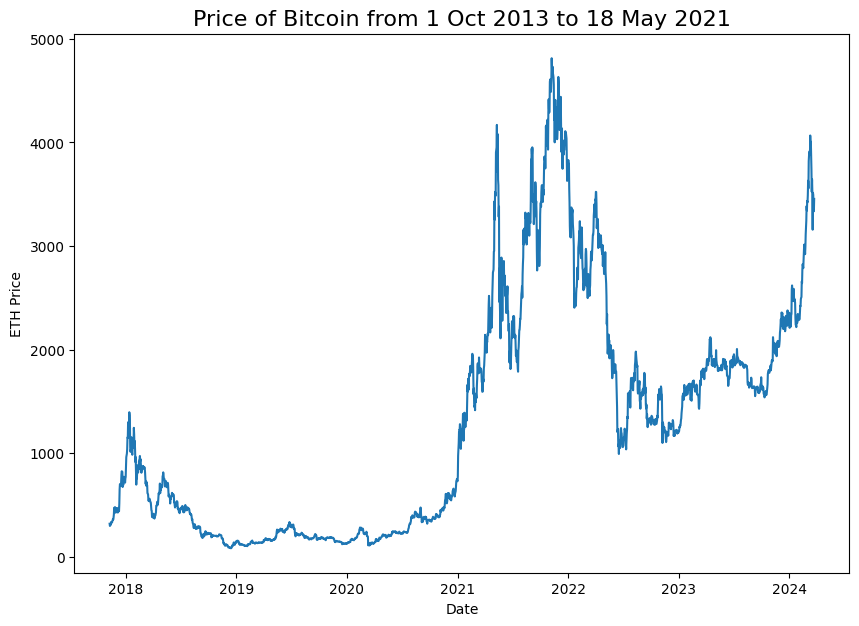

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, eth_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price");

### Creating Train and Test Set (for time series data)

In [ ]:
timesteps = ethereum_prices.index.to_numpy()
prices = ethereum_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2017-11-09T00:00:00.000000000', '2017-11-10T00:00:00.000000000',
        '2017-11-11T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
        '2017-11-13T00:00:00.000000000', '2017-11-14T00:00:00.000000000',
        '2017-11-15T00:00:00.000000000', '2017-11-16T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
        337.631012, 333.356995, 330.924011, 332.394012, 347.612   ]))

In [ ]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1862, 466, 1862, 466)

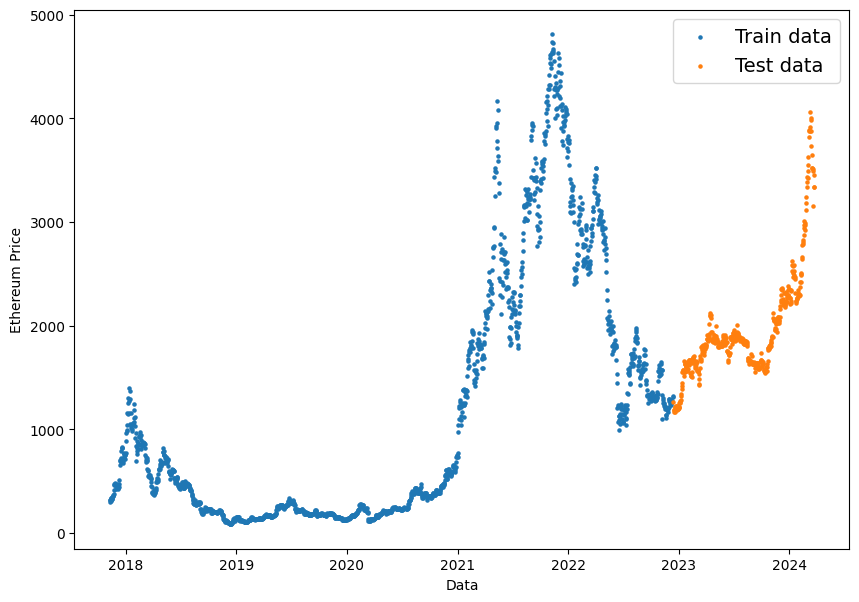

In [ ]:
plt.figure(figsize= (10, 7))
plt.scatter(X_train, y_train, s=5, label= "Train data")
plt.scatter(X_test, y_test, s=5, label= "Test data")
plt.xlabel("Data")
plt.ylabel("Ethereum Price")
plt.legend(fontsize=14)
plt.show();

**Creating a plotting Function**

In [ ]:
def plot_time_series(timesteps, values, format='.',start=0, end= None, label= None):
  plt.plot(timesteps[start:end], values[start:end], format, label= label)
  plt.xlabel("Time")
  plt.ylabel("Ethereum Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

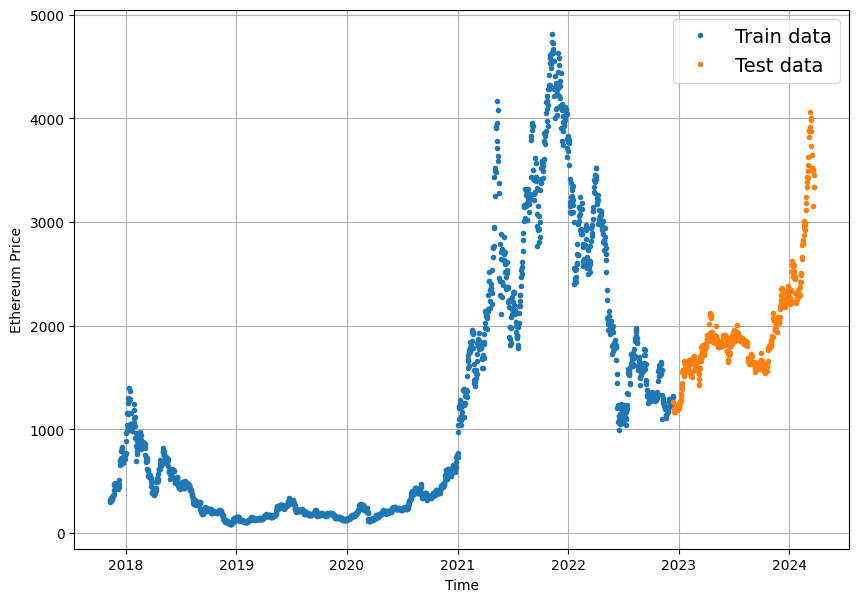

In [ ]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")

## Modelling Experiment

**Model 0**: Naive Model (baseline)

**Model 1**: Dense Model (window size= 30, horizon= 1)

**Model 2**: Conv1D

**Model 3**: N-Beats Algorithm

**Model 4**: Ensemble Technique

### Naive Model (baseline)



In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([1266.353882, 1168.259399, 1188.149536, 1184.71521 , 1167.609863,
        1217.703613, 1213.599976, 1218.182129, 1220.159424, 1221.14856 ]),
 array([3883.140381, 3735.220215, 3522.860107, 3642.413086, 3517.985107,
        3157.618164, 3513.393066, 3492.991211, 3333.687988, 3336.593994]))

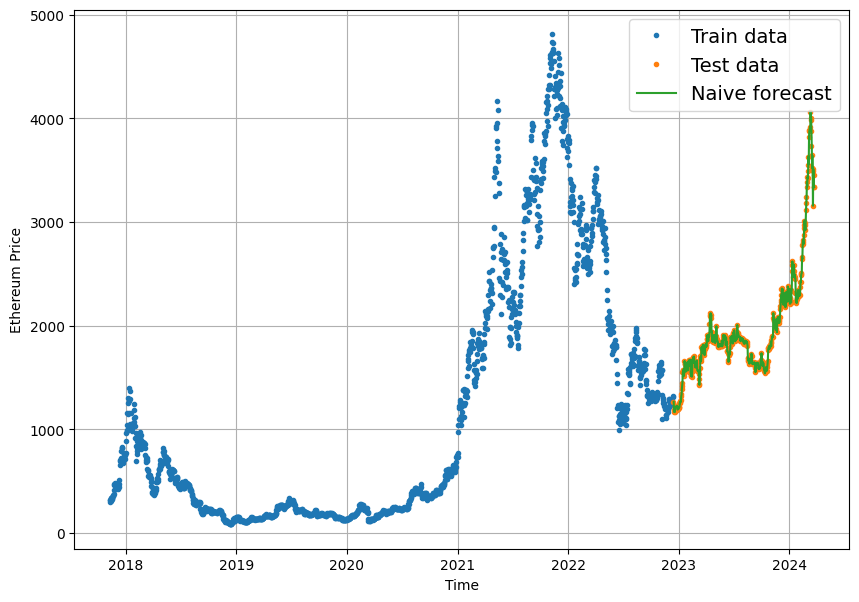

In [ ]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")
plot_time_series(timesteps= X_test[1:], values= naive_forecast, format= "-", label= "Naive forecast");

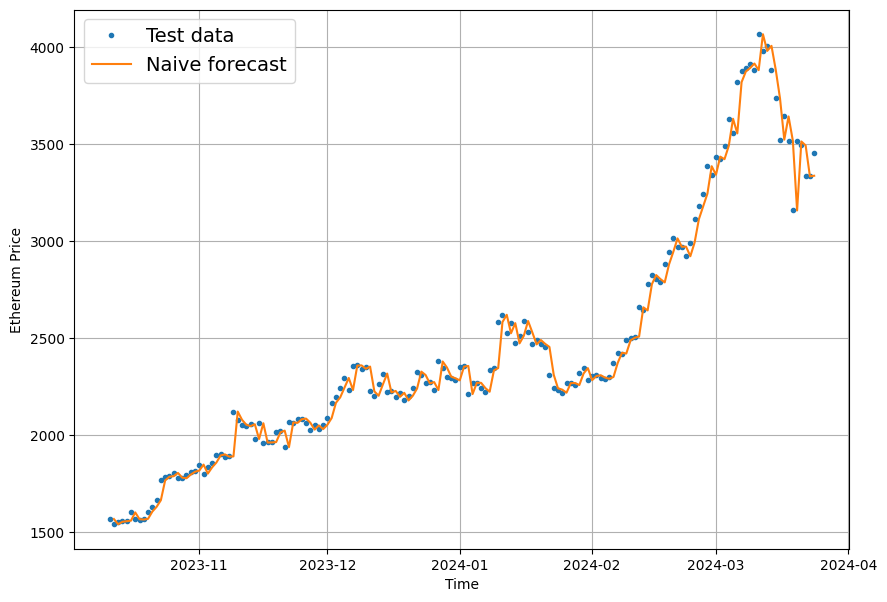

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

**Scale-dependent errors**
- MAE (mean absolute error)
- RMSE (root mean square error)

**Percentage errors**
- MAPE (mean absolute percentage error)
- sMAPE (symmetric mean absolute error)

**Scaled Errors**
- MASE (mean absolute scaled error)

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [ ]:
naive_results = evaluate_preds(y_true= y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 37.67836,
 'mse': 3442.704,
 'rmse': 58.67456,
 'mape': 1.8211035,
 'mase': 1.0034677}

### Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2321, 2321)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [320.884003 299.252991 314.681    307.90799  316.716003 337.631012
 333.356995] -> Label: [330.924011]
Window: [299.252991 314.681    307.90799  316.716003 337.631012 333.356995
 330.924011] -> Label: [332.394012]
Window: [314.681    307.90799  316.716003 337.631012 333.356995 330.924011
 332.394012] -> Label: [347.612]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [3735.220215 3522.860107 3642.413086 3517.985107 3157.618164 3513.393066
 3492.991211] -> Label: [3333.687988]
Window: [3522.860107 3642.413086 3517.985107 3157.618164 3513.393066 3492.991211
 3333.687988] -> Label: [3336.593994]
Window: [3642.413086 3517.985107 3157.618164 3513.393066 3492.991211 3333.687988
 3336.593994] -> Label: [3454.636475]


### Turning Windows into Training and Test Sets

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1856, 465, 1856, 465)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
         337.631012, 333.356995],
        [299.252991, 314.681   , 307.90799 , 316.716003, 337.631012,
         333.356995, 330.924011],
        [314.681   , 307.90799 , 316.716003, 337.631012, 333.356995,
         330.924011, 332.394012],
        [307.90799 , 316.716003, 337.631012, 333.356995, 330.924011,
         332.394012, 347.612   ],
        [316.716003, 337.631012, 333.356995, 330.924011, 332.394012,
         347.612   , 354.385986]]),
 array([[330.924011],
        [332.394012],
        [347.612   ],
        [354.385986],
        [366.730011]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

### Make a Modelling Checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
15/15 [==============================] - 5s 185ms/step - loss: 477.6983 - mae: 477.6983 - val_loss: 270.1641 - val_mae: 270.1641
Epoch 2/100
15/15 [==============================] - 1s 78ms/step - loss: 139.3072 - mae: 139.3072 - val_loss: 173.3274 - val_mae: 173.3274
Epoch 3/100
15/15 [==============================] - 1s 66ms/step - loss: 87.0270 - mae: 87.0270 - val_loss: 64.7971 - val_mae: 64.7971
Epoch 4/100
15/15 [==============================] - 1s 65ms/step - loss: 73.5441 - mae: 73.5441 - val_loss: 62.6638 - val_mae: 62.6638
Epoch 5/100
15/15 [==============================] - 1s 58ms/step - loss: 68.6372 - mae: 68.6372 - val_loss: 60.2286 - val_mae: 60.2286
Epoch 6/100
15/15 [==============================] - 0s 30ms/step - loss: 65.8339 - mae: 65.8339 - val_loss: 59.1884 - val_mae: 59.1884
Epoch 7/100
15/15 [==============================] - 0s 29ms/step - loss: 64.1493 - mae: 64.1493 - val_loss: 58.5172 - val_mae: 58.5172
Epoch 8/100
15/15 [====================

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 56.2877 - mae: 56.2877


[56.28772735595703, 56.28772735595703]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 3ms/step - loss: 37.6837 - mae: 37.6837


[37.68367004394531, 37.68367004394531]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

15/15 [==============================] - 0s 2ms/step


(465,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1282.0854, 1195.0695, 1182.353 , 1184.2163, 1172.762 , 1207.9337,
        1219.0797, 1221.808 , 1224.2035, 1225.0101], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 37.683666,
 'mse': 3382.3142,
 'rmse': 58.157665,
 'mape': 1.8278623,
 'mase': 1.0036091}

In [ ]:
naive_results

{'mae': 37.67836,
 'mse': 3442.704,
 'rmse': 58.67456,
 'mape': 1.8211035,
 'mase': 1.0034677}

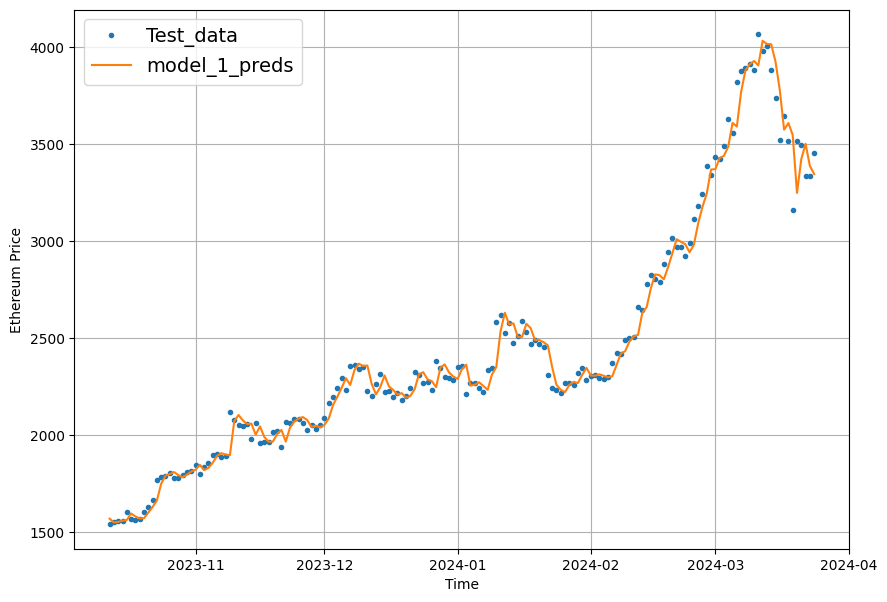

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

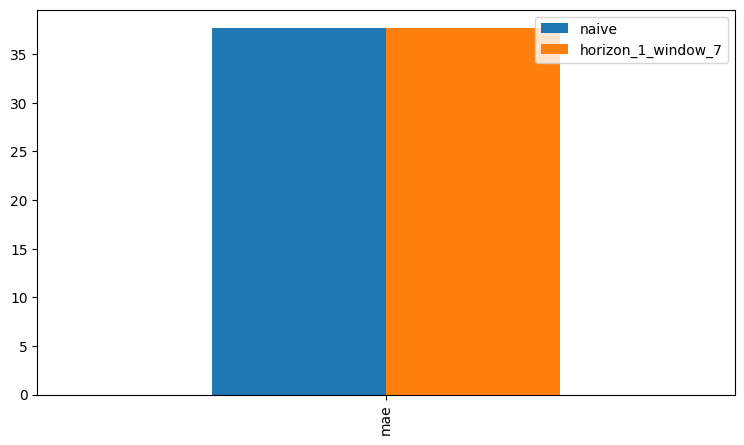

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"]}, index=["mae"]).plot(figsize=(9, 5), kind="bar");

### Model 2: Conv1D

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1856, 465, 1856, 465)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[320.884]
 [299.253]
 [314.681]
 [307.908]
 [316.716]
 [337.631]
 [333.357]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_conv1D")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.summary()

Model: "model_2_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_conv1D")
model_2.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 5ms/step - loss: 37.6343


37.63434600830078

In [ ]:
# Make predictions
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

15/15 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1281.4115, 1196.4983, 1183.0641, 1182.1707, 1167.765 , 1201.8086,
       1208.652 , 1220.7905, 1222.1775, 1221.7407], dtype=float32)>

In [ ]:
# Evaluate predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 37.634346,
 'mse': 3385.0552,
 'rmse': 58.18123,
 'mape': 1.8243936,
 'mase': 1.0022955}

### Model 3: N-Beats Algorithm

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.27647394 -0.1263969  -0.6698165   1.1169289   0.39961156  0.41830045
  0.15546897]
Forecast: 0.05979132652282715


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


In [ ]:
ethereum_prices_nbeats = ethereum_prices.copy()
for i in range(WINDOW_SIZE):
  ethereum_prices_nbeats[f"Price+{i+1}"] = ethereum_prices_nbeats["Price"].shift(periods=i+1)
ethereum_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2017-11-16,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000,299.252991,320.884003
2017-11-17,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000,299.252991
2017-11-18,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000
2017-11-19,354.385986,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990
2017-11-20,366.730011,354.385986,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003


In [ ]:
# Make features and labels
X = ethereum_prices_nbeats.dropna().drop("Price", axis=1)
y = ethereum_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1856, 1856, 465, 465)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_3 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_3.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 148: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 248: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 27s, sys: 2.61 s, total: 1min 30s
Wall time: 1min 37s


In [ ]:
model_3.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 36.3417 - mae: 36.3417 - mse: 3203.7842


[36.341732025146484, 36.341732025146484, 3203.7841796875]

In [ ]:
# Make predictions with N-BEATS model
model_3_preds = make_preds(model_3, test_dataset)
model_3_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1273.7788, 1192.1992, 1190.1656, 1185.9302, 1178.5304, 1218.7388,
       1214.7108, 1218.7078, 1216.9398, 1221.0231], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_3_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 36.341732,
 'mse': 3203.7842,
 'rmse': 56.60198,
 'mape': 1.7678516,
 'mase': 0.96787006}

**Plotting Our N-Beats Model**

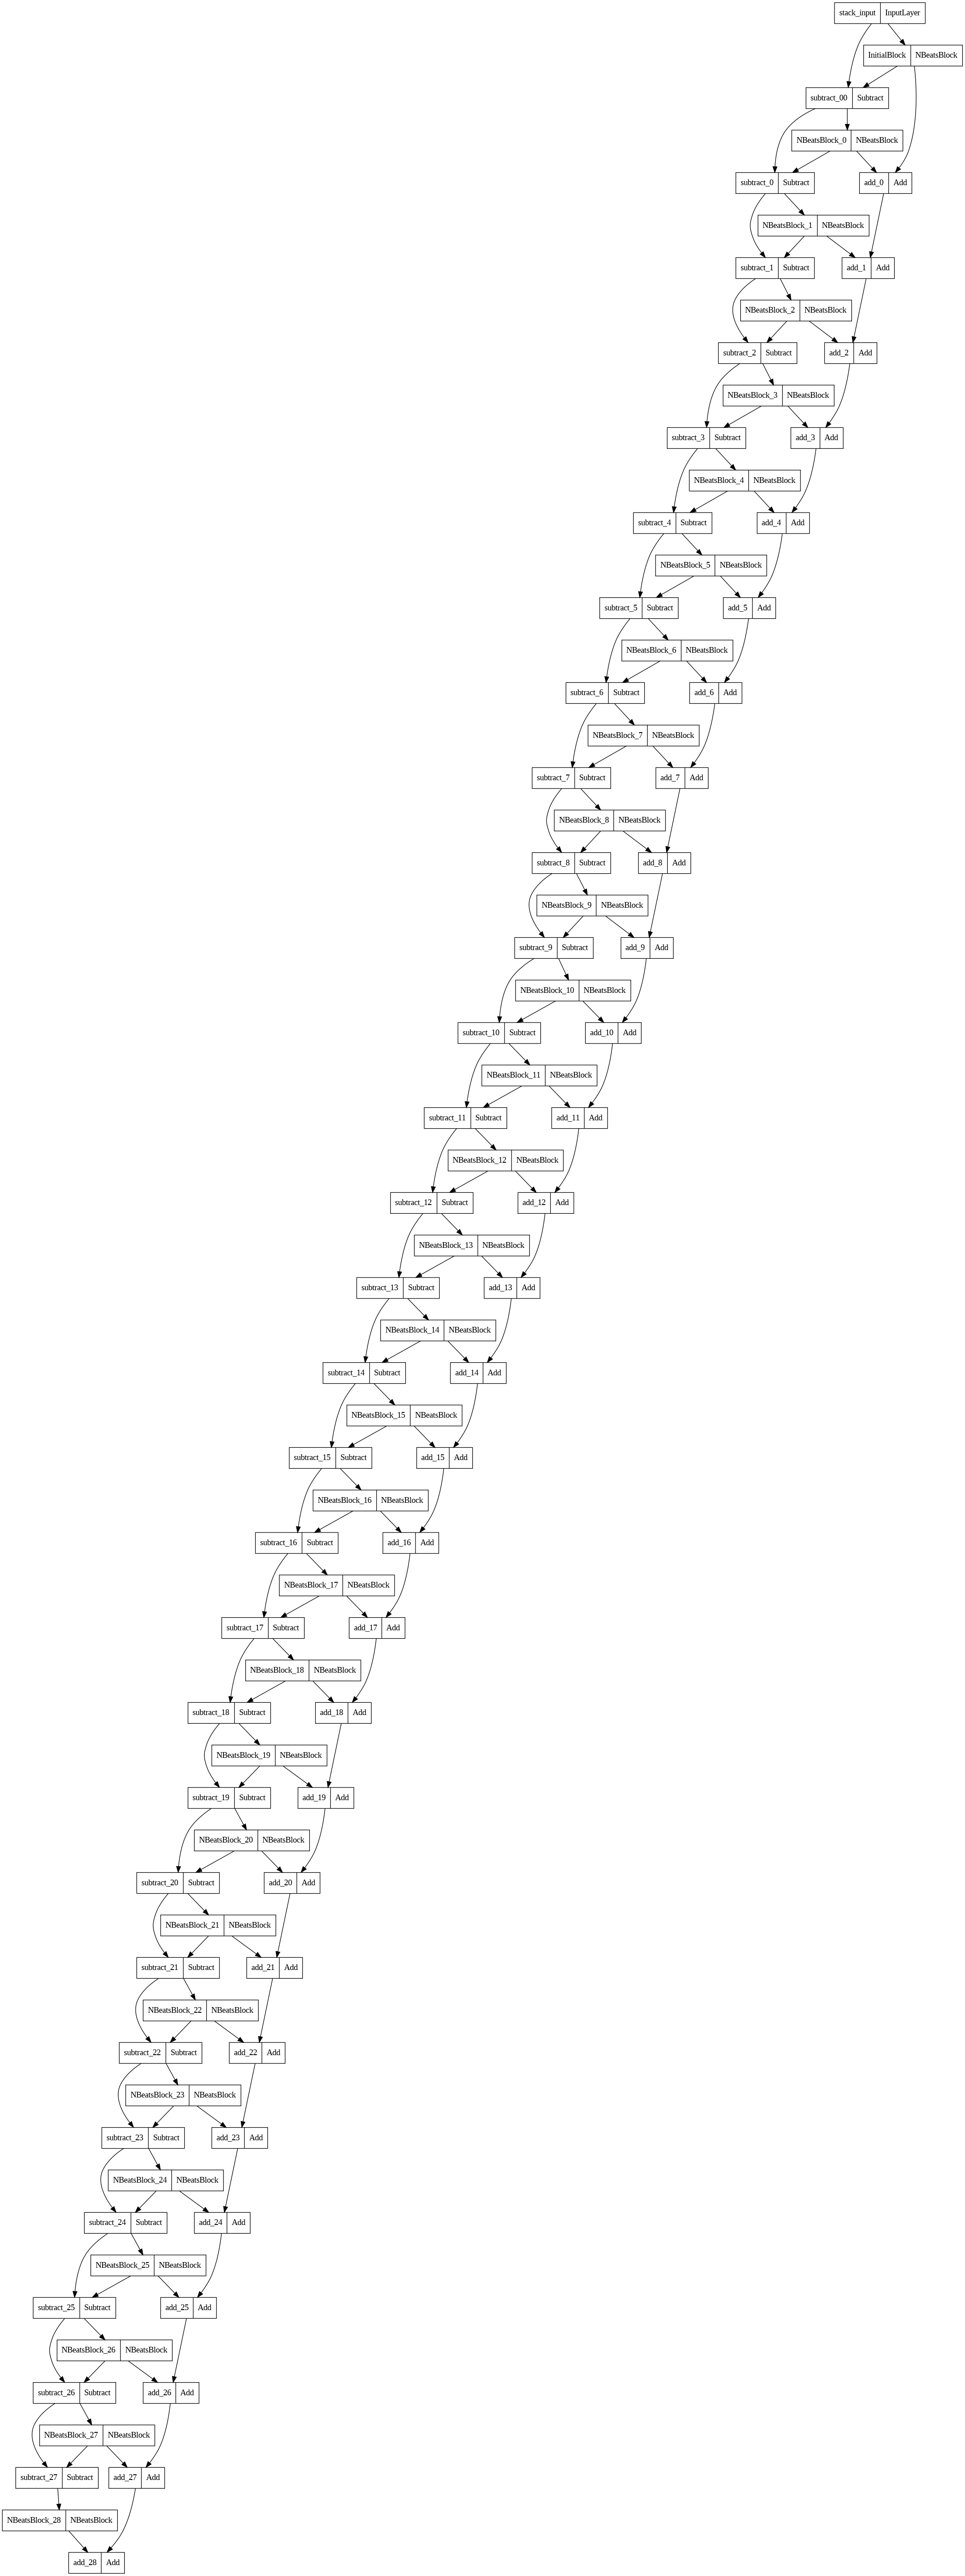

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_3)

In [ ]:
model_3.save(model_3.name)

### Model 4: Creating an Ensemble (stacking different models together)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 555: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 655: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 938: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 123: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 725: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 857: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 957: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 255: ReduceLROnPlateau reduci

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 39ms/step


<tf.Tensor: shape=(15, 465), dtype=float32, numpy=
array([[1270.1906, 1182.3715, 1187.4833, ..., 3487.76  , 3347.3445,
        3344.2634],
       [1267.4241, 1175.6025, 1172.9233, ..., 3434.6602, 3374.8418,
        3332.1562],
       [1268.1982, 1169.3383, 1183.8934, ..., 3486.5027, 3331.0144,
        3343.5828],
       ...,
       [1267.7228, 1172.9784, 1185.6047, ..., 3499.7373, 3359.3735,
        3359.0496],
       [1268.6626, 1175.978 , 1177.3826, ..., 3442.7544, 3326.2734,
        3391.993 ],
       [1269.8939, 1174.3671, 1182.8356, ..., 3536.4587, 3350.9424,
        3363.305 ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 37.219288,
 'mse': 3322.0881,
 'rmse': 57.637558,
 'mape': 1.8052992,
 'mase': 0.9912415}

<Axes: >

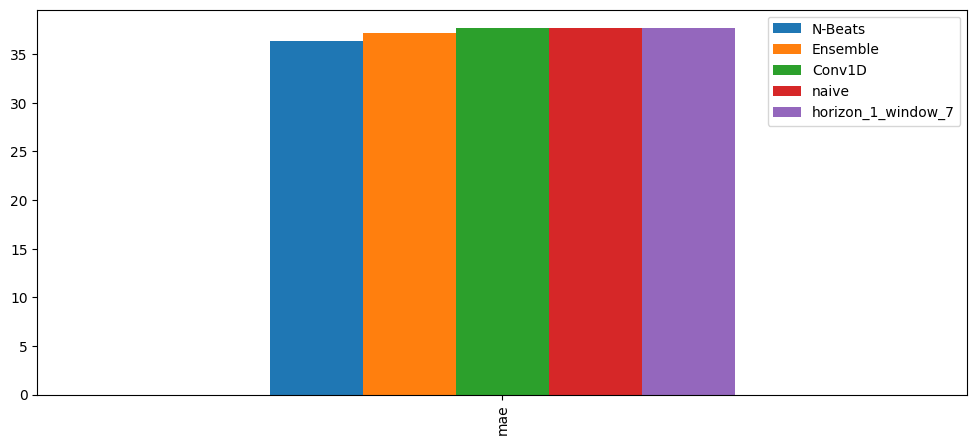

In [ ]:
results_df = pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "Conv1D": model_2_results["mae"],
              "N-Beats": model_3_results["mae"],
              "Ensemble": ensemble_results["mae"]}, index=["mae"])
sorted_results_df = results_df.sort_values(by="mae", axis=1)
sorted_results_df.plot(figsize=(12, 5), kind="bar")